<span style="font-size:16pt">
<p style="text-align: center;">
    МИНОБРНАУКИ РОССИИ <br>
    РГУ НЕФТИ И ГАЗА (НИУ) ИМЕНИ И.М. ГУБКИНА<br>
    ФАКУЛЬТЕТ АВТОМАТИКИ И ВЫЧИСЛИТЕЛЬНОЙ ТЕХНИКИ<br>
    КАФЕДРА АВТОМАТИЗИРОВАННЫХ СИСТЕМ УПРАВЛЕНИЯ<br>  <br>
    ДИСЦИПЛИНА <br>
        «Теория принятия решений. Нечеткие модели»
    <br><br> <br> <br> <br> <br>
    ОТЧЁТ <br>
    по лабораторной работе №3 <br>
    «Нечеткая кластеризация методом C-средних<br> <br> <br> <br> <br>  <br><br>
</p>

<p style="text-align: right;">
    Выполнил:<br>
    студент группы АС-21-05, Негробов В.А.<br>
    Проверил:<br>
    Манзюк Н.Ю.<br><br> <br> <br> <br> <br><br> <br> <br>

<p style="text-align: center;">
    МОСКВА 2025
</p>
   </span>

Подключение библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

Определение нечёткой кластеризации методом C-средних

In [2]:
def initialize_membership_matrix(n_samples, n_clusters):
    """
    Инициализирует матрицу принадлежности для алгоритма нечеткой кластеризации C-средних.
    Args:
        n_samples (int): Количество точек данных.
        n_clusters (int): Количество кластеров.
    Returns:
        np.ndarray: Инициализированная матрица принадлежности.
    """
    U = np.random.dirichlet(np.ones(n_clusters), size=n_samples).T
    return U

In [3]:
def compute_centroids(data, U, m):
    """
    Вычисляет центроиды кластеров на основе матрицы принадлежности.
    Args:
        data (np.ndarray): Данные для кластеризации.
        U (np.ndarray): Матрица принадлежности.
        m (float): Параметр нечеткости.
    Returns:
        np.ndarray: Центроиды кластеров.
    """
    um = U ** m
    return (um @ data) / np.sum(um, axis=1, keepdims=True)

In [4]:
def update_membership_matrix(data, centroids, m):
    """
    Обновляет матрицу принадлежности на основе текущих центроидов.
    Args:
        data (np.ndarray): Данные для кластеризации.
        centroids (np.ndarray): Текущие центроиды кластеров.
        m (float): Параметр нечеткости.
    Returns:
        np.ndarray: Обновленная матрица принадлежности.
    """
    distances = np.linalg.norm(data[:, np.newaxis, :] - centroids, axis=2)
    distances = np.fmax(distances, np.finfo(np.float64).eps)
    inv_distances = distances ** (-2 / (m - 1))
    return inv_distances / np.sum(inv_distances, axis=1, keepdims=True)

In [5]:
def fuzzy_c_means(data, n_clusters=3, m=2, error=1e-5, max_iter=1000):
    """
    Реализация алгоритма Fuzzy C-Means.
    Args:
        data (np.ndarray): Данные для кластеризации.
        n_clusters (int): Количество кластеров.
        m (float): Параметр нечеткости.
        error (float): Порог ошибки для остановки итераций.
        max_iter (int): Максимальное количество итераций.
    Returns:
        tuple[np.ndarray, np.ndarray]: Кортеж, содержащий центроиды кластеров и матрицу принадлежности.
    """
    n_samples = data.shape[0]
    U = initialize_membership_matrix(n_samples, n_clusters)
    for _ in range(max_iter):
        U_old = U.copy()
        centroids = compute_centroids(data, U, m)
        U = update_membership_matrix(data, centroids, m).T
        if np.linalg.norm(U - U_old) < error:
            break
    return centroids, U


In [6]:
def defuzzification(U):
    """
    Функция для дефаззификации матрицы принадлежности.
    Выполняет ранжирование объектов по важности.
    Args:
        U (np.ndarray): Матрица принадлежности.
    Returns:
        np.ndarray: Массив индексов кластеров для каждого объекта.
    """
    return np.argmax(U, axis=0)

In [7]:
def blend_colors(memberships, color_list):
    """
    Смешивание цветов в зависимости от степени принадлежности к кластерам.
    Args:
        memberships (np.ndarray): Массив степеней принадлежности к кластерам.
        color_list (list): Список цветов для каждого кластера.
    Returns:
        np.ndarray: Кортеж, содержащий RGB-значения смешанного цвета.
    """
    return sum(
                np.array(mcolors.to_rgb(color)) * membership
                    for membership, color in zip(memberships, color_list)
               )

Создание данных, для которых будет применяться кластеризация

In [ ]:
np.random.seed(0)
# параметры кластеров: (среднее, среднее, стандартное отклонение, стандартное отклонение)
cluster_params = [(0, 0, 1, 2), (-0.9, 0.9, 1.1, 1), (1, 1, 4, 1)]
cluster_size = 1000 # количество точек в каждом кластере
num_clusters = len(cluster_params) # количество кластеров

# генерация данных для каждого кластера и объединение их в один массив
data = list()
for mean1, mean2, std1, std2 in cluster_params:
    data.append(
        np.hstack(
            (
                np.random.randn(cluster_size, 1) * std1 + mean1,
                np.random.randn(cluster_size, 1) * std2 + mean2
            )
        )
    )
data = np.vstack(data)
data.shape

(3000, 2)

Применение метода C-средних

In [9]:
centroids, U = fuzzy_c_means(data, n_clusters=num_clusters, m=2, error=1e-5, max_iter=1000) 

Визуализация результатов кластеризацзации

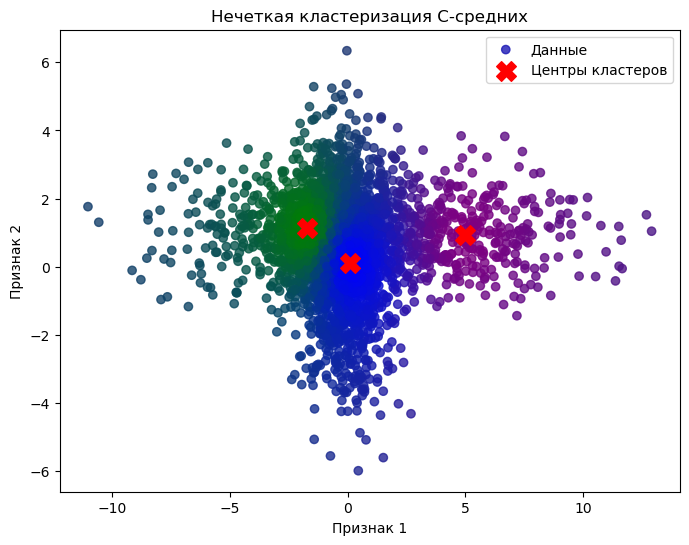

In [10]:
fig, ax = plt.subplots(figsize=(8, 6)) # 
colors = ['blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray'][:num_clusters] # список цветов для кластеров
norm = mcolors.Normalize(vmin=0, vmax=1) # нормализация значений матрицы принадлежности для отображения цветов
point_colors = [blend_colors(U[:, i], colors) for i in range(data.shape[0])] # создание списка цветов для точек данных на основе матрицы принадлежности
# Построение графиков
ax.scatter(data[:, 0], data[:, 1], color=point_colors, alpha=0.8, label='Данные')
ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Центры кластеров')
ax.set_title('Нечеткая кластеризация C-средних')
ax.set_xlabel('Признак 1')
ax.set_ylabel('Признак 2')
ax.legend()

Визуализациия результатов кластеризацзии после дефаззификации

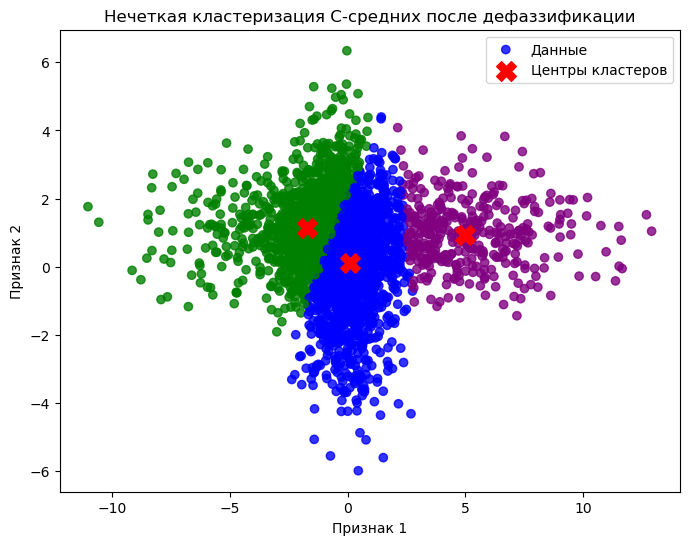

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray'][:num_clusters]
norm = mcolors.Normalize(vmin=0, vmax=1)
defuzzificated_clasters = defuzzification(U)
point_colors = [colors[defuzzificated_clasters[i]] for i in range(data.shape[0])]
ax.scatter(data[:, 0], data[:, 1], color=point_colors, alpha=0.8, label='Данные')
ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Центры кластеров')
ax.set_title('Нечеткая кластеризация C-средних после дефаззификации')
ax.set_xlabel('Признак 1')
ax.set_ylabel('Признак 2')
ax.legend()